In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re

def remove_emojis_and_links(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF"  
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text_without_emojis = emoji_pattern.sub(r'', text)
    
   
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text_without_links = url_pattern.sub(r'', text_without_emojis)
    
    return text_without_links


df = pd.read_csv('putin_tucker.csv')


for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].apply(remove_emojis_and_links)

df.to_csv('cleaned_dfset.csv', index=False)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Comment            100000 non-null  object
 1   Anonymized Author  100000 non-null  object
 2   Published At       100000 non-null  object
 3   Likes              100000 non-null  int64 
 4   Reply Count        100000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


In [4]:
df.isnull().sum()

Comment              0
Anonymized Author    0
Published At         0
Likes                0
Reply Count          0
dtype: int64

In [5]:
df.describe()

,Likes,Reply Count
count,100000.000000,100000.000000
mean,52.227230,2.386920
std,310.010713,7.695083
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,11.000000,1.000000
max,79514.000000,750.000000


In [6]:
df.drop_duplicates()


,Comment,Anonymized Author,Published At,Likes,Reply Count
0,Watch my immediate reaction to the interview h...,533fb31af87a0ff551c4dc7a73634ccf7e9005f8eb4673...,2024-02-08T23:44:11Z,25601,750
1,The Russian to English translator did an EXCEL...,e00ef7ce570d1e6ba6e914755ffb9a0055386a3b0a6114...,2024-02-09T02:33:19Z,79514,750
2,The translation from Russian to English was ex...,c4add09939263f9b8509035f63b869662bc542641a3dc3...,2024-02-19T04:32:50Z,265,5
3,That was the longest 1 minute and 30 seconds h...,5b4d9b16bbfbc80edcb1941313fc0ee53748aea58bf3b8...,2024-02-18T06:58:59Z,1076,27
4,What's the difference between Tucker and a mob...,05ed0eddfa93d78083bcfb64186f749c6667c87da5ebc5...,2024-02-19T09:52:34Z,70,0
...,...,...,...,...,...
99995,Could you imagine Biden trying to discuss the ...,02d6f4bf8ad07e591ffab304e38b248991b4e305d118b6...,2024-02-18T03:49:31Z,0,0
99996,Meanwhile...Our American President is too inco...,37f09b2b0f7f8d8541aaec019f261b505be75dac2df40d...,2024-02-18T23:47:08Z,1,0
99997,thank god fox fire you they did you a big favo...,2ffa54fee25c206960c59620214df3d4b0a5cfd0992824...,2024-02-20T07:40:31Z,0,0
99998,Tucker got trolled. Made to sit there and be t...,09ce660581ebc4bdc4bbbfb4c0bdb0a99e8661b69023cf...,2024-02-19T05:48:24Z,3,0


In [7]:
likes_threshold = 1000
reply_threshold = 50
df['Cyberbullying'] = ((df['Likes'] >= likes_threshold) | (df['Reply Count'] >= reply_threshold)).astype(int)
print(df.head())

                                             Comment   
0  Watch my immediate reaction to the interview h...  \
1  The Russian to English translator did an EXCEL...   
2  The translation from Russian to English was ex...   
3  That was the longest 1 minute and 30 seconds h...   
4  What's the difference between Tucker and a mob...   

                                   Anonymized Author          Published At   
0  533fb31af87a0ff551c4dc7a73634ccf7e9005f8eb4673...  2024-02-08T23:44:11Z  \
1  e00ef7ce570d1e6ba6e914755ffb9a0055386a3b0a6114...  2024-02-09T02:33:19Z   
2  c4add09939263f9b8509035f63b869662bc542641a3dc3...  2024-02-19T04:32:50Z   
3  5b4d9b16bbfbc80edcb1941313fc0ee53748aea58bf3b8...  2024-02-18T06:58:59Z   
4  05ed0eddfa93d78083bcfb64186f749c6667c87da5ebc5...  2024-02-19T09:52:34Z   

   Likes  Reply Count  Cyberbullying  
0  25601          750              1  
1  79514          750              1  
2    265            5              0  
3   1076           27              1  

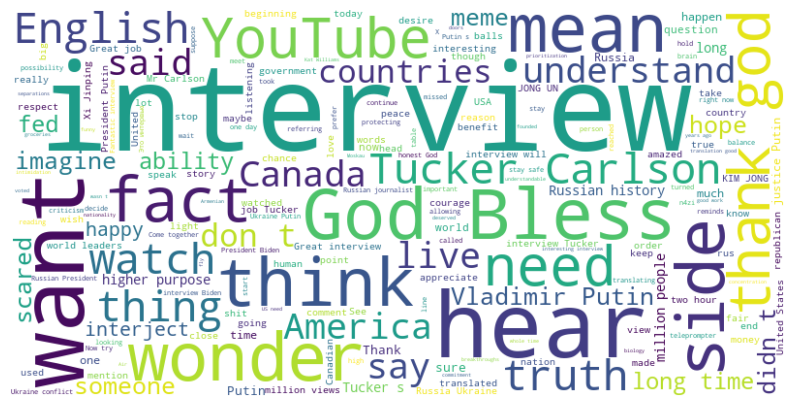

In [8]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text_data = df['Comment'].str.cat(sep=' ') 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 10000x5000 with 0 Axes>

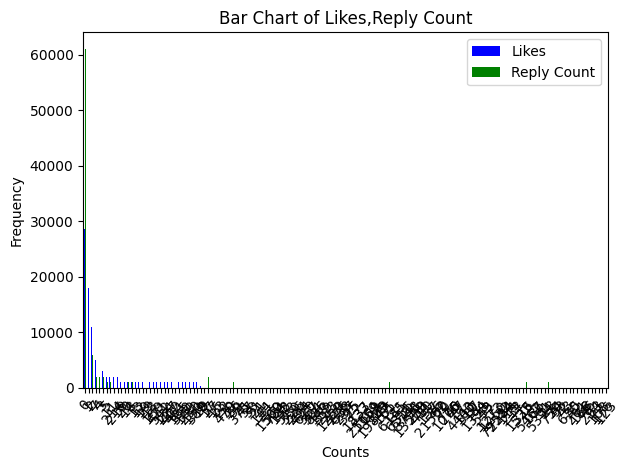

In [9]:
columns = ['Likes','Reply Count']
combined_counts = pd.DataFrame()
for col in columns:
    col_counts = df[col].value_counts().rename(col)
    combined_counts = pd.concat([combined_counts, col_counts], axis=1)

plt.figure(figsize=(100, 50))
combined_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Bar Chart of Likes,Reply Count')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.xticks(rotation=50)
plt.tight_layout() 
plt.show()


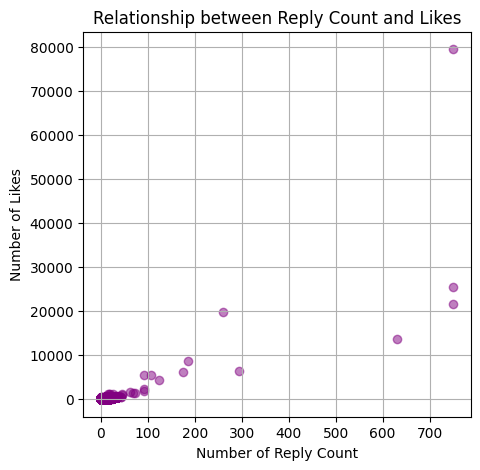

In [10]:
color = 'Purple'
reply_count = df['Reply Count']
likes = df['Likes']

plt.figure(figsize=(5,5))
plt.scatter(reply_count, likes, alpha=0.5,color=color)
plt.title('Relationship between Reply Count and Likes')
plt.xlabel('Number of Reply Count')
plt.ylabel('Number of Likes')
plt.grid(True)
plt.show()

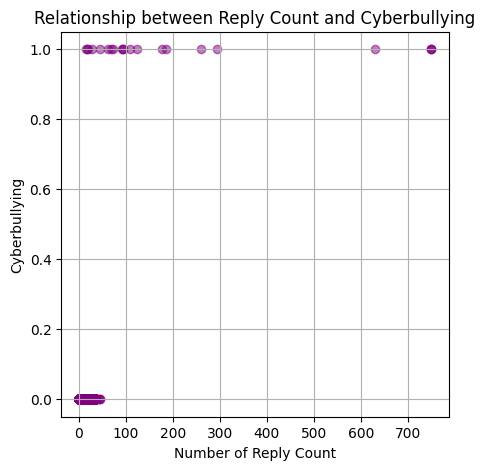

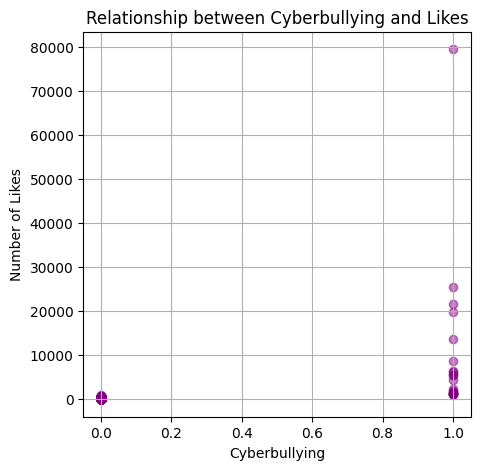

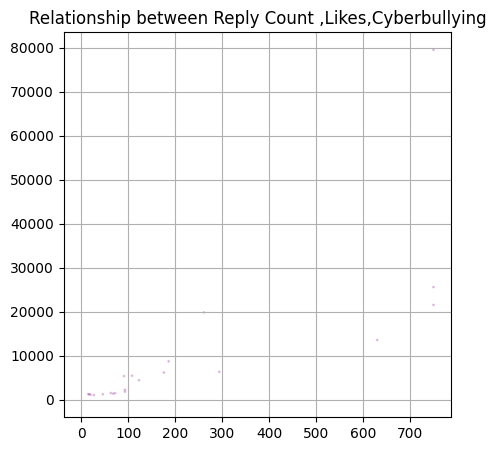

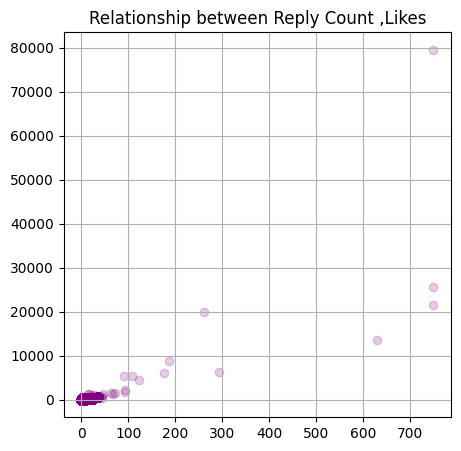

In [11]:
from matplotlib import pyplot as plt
reply_count = df['Reply Count']
Cyberbullying = df['Cyberbullying']

plt.figure(figsize=(5, 5))
plt.scatter(reply_count, Cyberbullying,alpha=0.5,color=color)
plt.title('Relationship between Reply Count and Cyberbullying')
plt.xlabel('Number of Reply Count')
plt.ylabel('Cyberbullying')
plt.grid(True)
plt.show()

likes = df['Likes']

plt.figure(figsize=(5, 5))
plt.scatter(Cyberbullying, likes, alpha=0.5,color=color)
plt.title('Relationship between Cyberbullying and Likes')
plt.xlabel('Cyberbullying')
plt.ylabel('Number of Likes')
plt.grid(True)
plt.show()



plt.figure(figsize=(5, 5))
plt.scatter(reply_count, likes,Cyberbullying, alpha=0.2,color=color)
plt.title('Relationship between Reply Count ,Likes,Cyberbullying')

plt.grid(True)
plt.show()

plt.figure(figsize=(5, 5))
plt.scatter(reply_count, likes, alpha=0.2,color=color)
plt.title('Relationship between Reply Count ,Likes')

plt.grid(True)
plt.show()


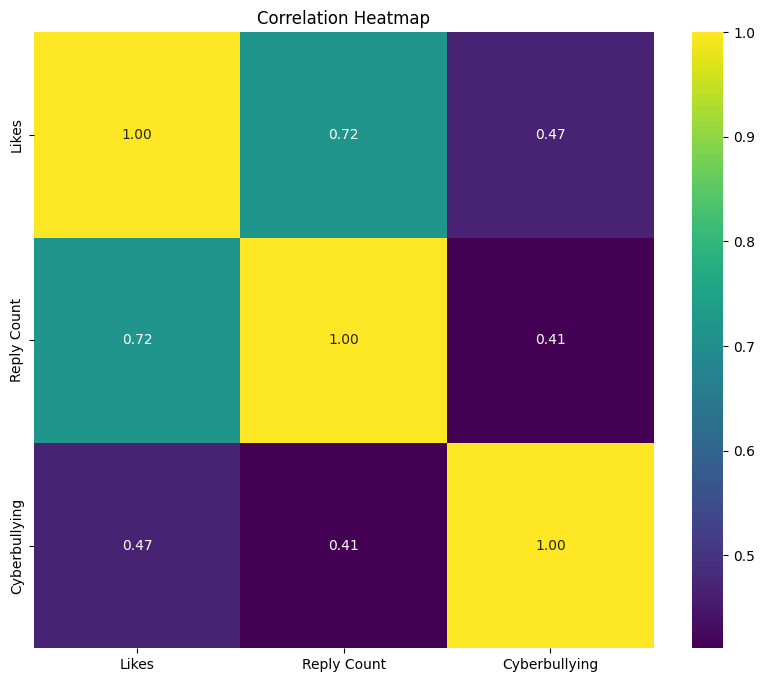

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[['Likes', 'Reply Count','Cyberbullying']].corr(), annot=True,cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')

plt.show()


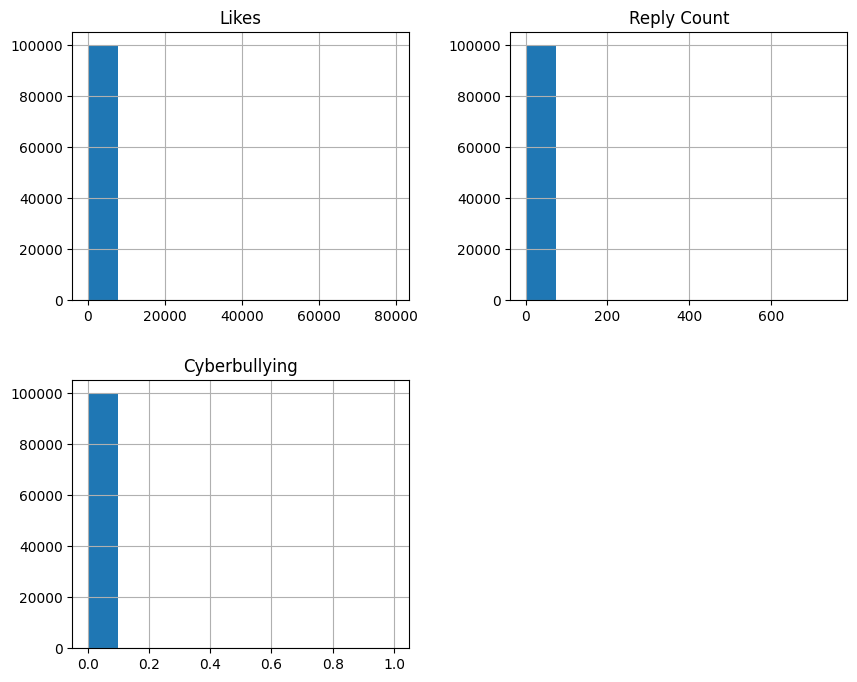

In [13]:
df.hist(figsize=(10, 8))
plt.show()


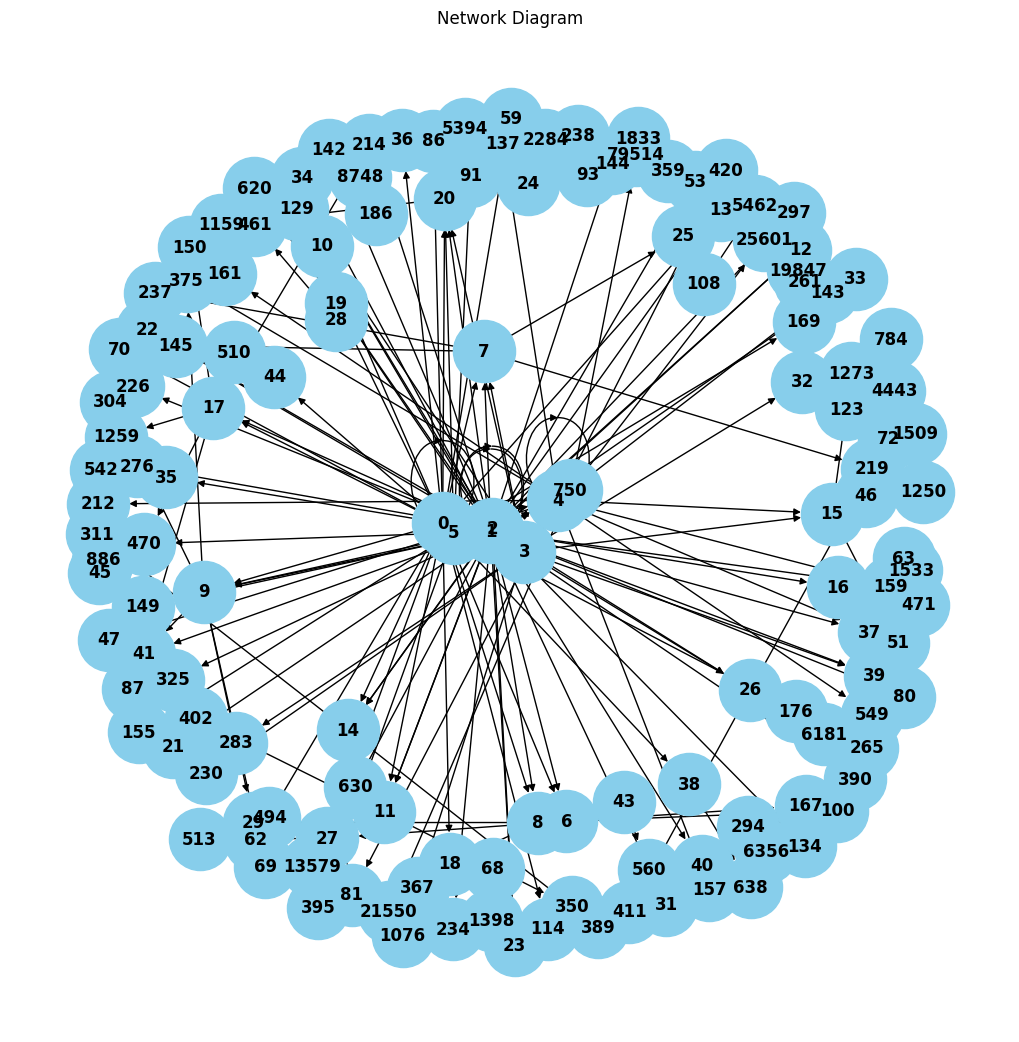

In [14]:
import networkx as nx
G = nx.from_pandas_edgelist(df, source='Reply Count', target='Likes', create_using=nx.DiGraph)

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold')
plt.title('Network Diagram')
plt.show()


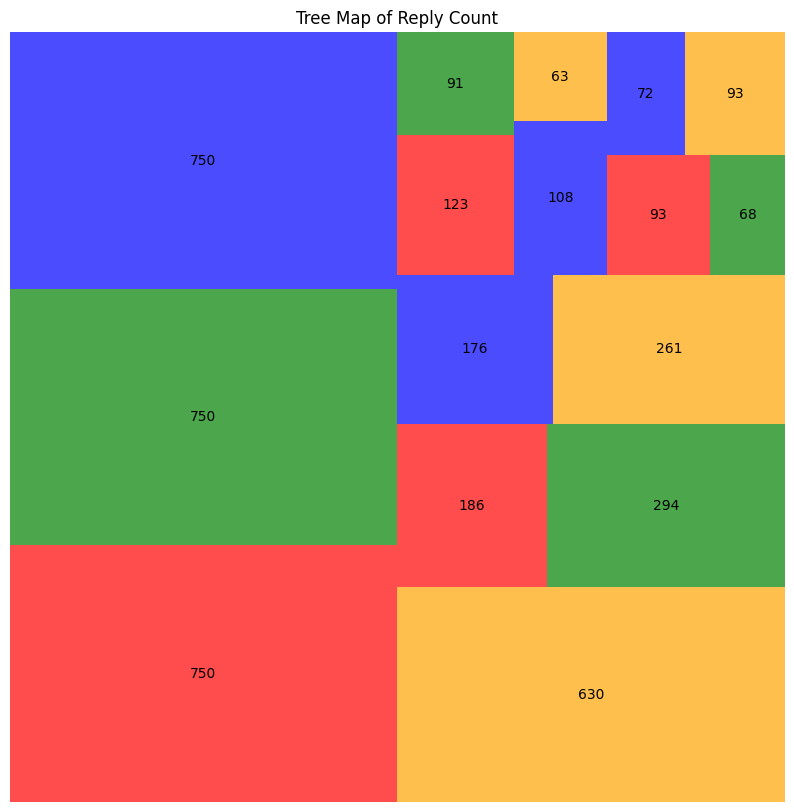

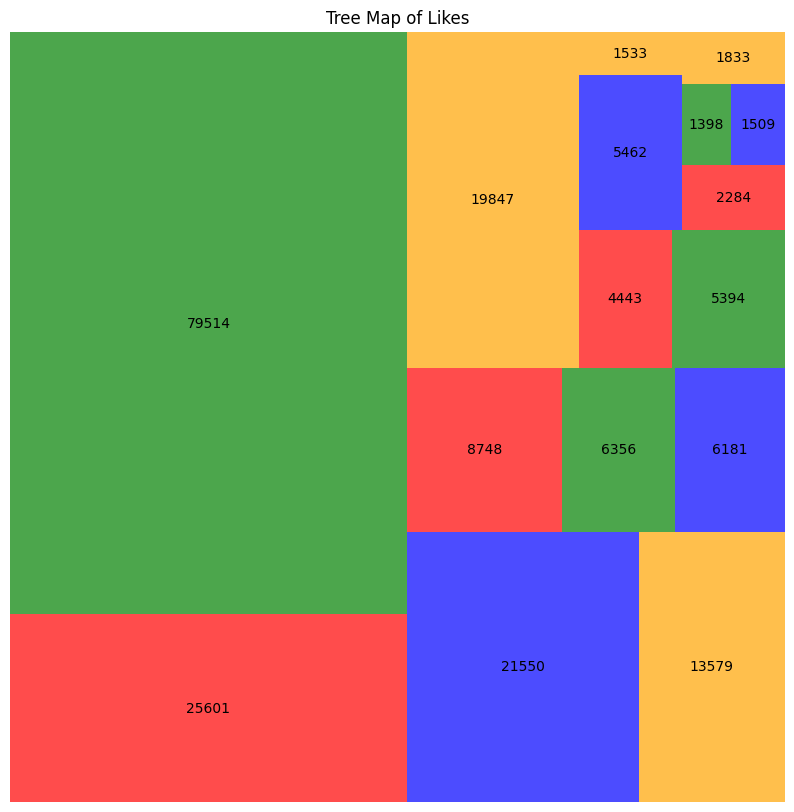

In [15]:
import squarify

if 'Reply Count' in df.columns and pd.api.types.is_numeric_dtype(df['Reply Count']):
    if df['Reply Count'].isnull().any():
        print("NaN values found in 'Reply Count' column. Please handle missing values.")
    else:
       
        df = df[df['Reply Count'] > 60]

        sizes = df['Reply Count'] + 0.1
        normed = squarify.normalize_sizes(sizes, 10, 10)
        plt.figure(figsize=(10, 10))
        squarify.plot(sizes=normed, label=df['Reply Count'], color=['red', 'green', 'blue', 'orange'], alpha=0.7)
        plt.axis('off')
        plt.title('Tree Map of Reply Count')
        plt.show()
else:
    print("No 'Reply Count' column found or it does not contain numerical values")
    
    
 

if 'Likes' in df.columns and pd.api.types.is_numeric_dtype(df['Reply Count']):
    if df['Likes'].isnull().any():
        print("NaN values found in 'Reply Count' column. Please handle missing values.")
    else:
       
        df = df[df['Likes'] > 60]

        sizes = df['Likes'] + 0.1
        normed = squarify.normalize_sizes(sizes, 10, 10)
        plt.figure(figsize=(10, 10))
        squarify.plot(sizes=normed, label=df['Likes'], color=['red', 'green', 'blue', 'orange'], alpha=0.7)
        plt.axis('off')
        plt.title('Tree Map of Likes')
        plt.show()
else:
    print("No 'Reply Count' column found or it does not contain numerical values")

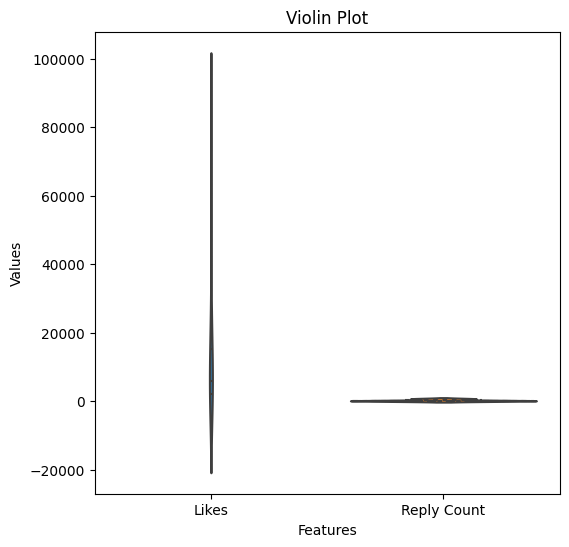

In [16]:
plt.figure(figsize=(6, 6))
sns.violinplot(data=df[['Likes', 'Reply Count']], inner='quartile')
plt.title('Violin Plot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

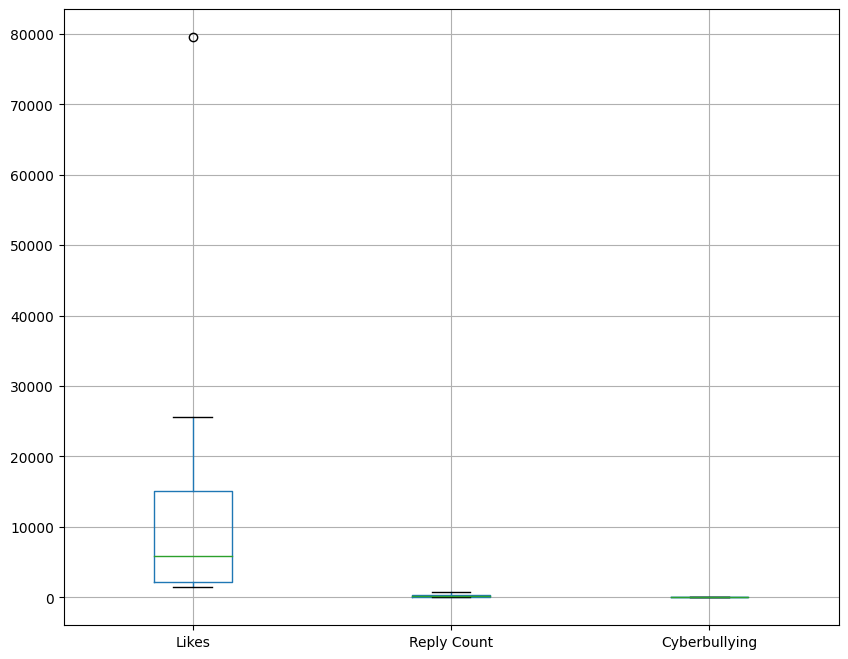

In [17]:

plt.figure(figsize=(10, 8))
df.boxplot()
plt.show()


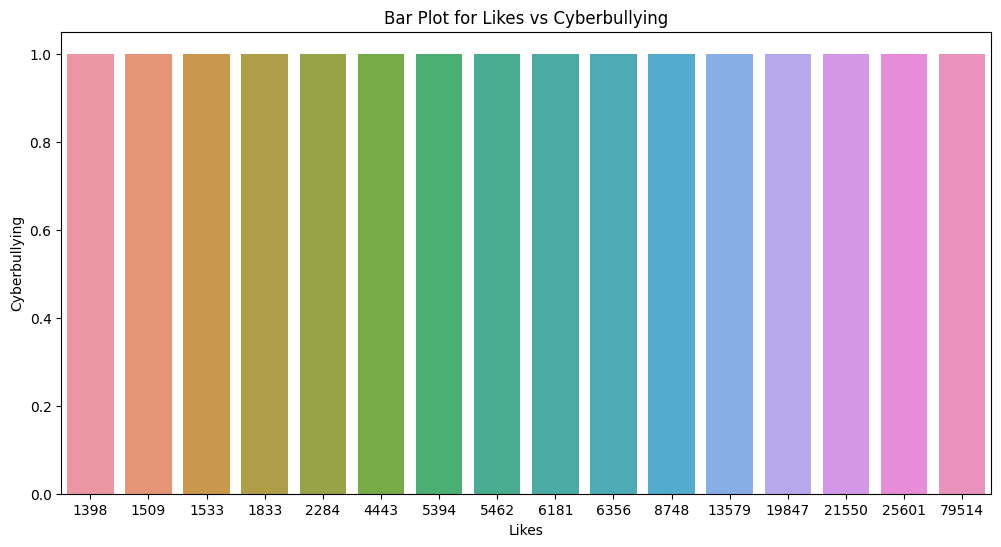

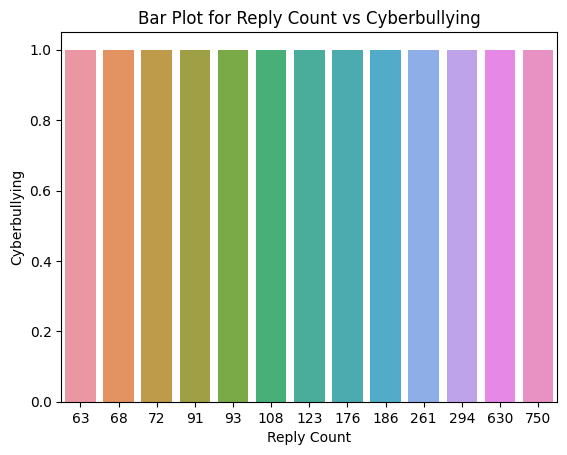

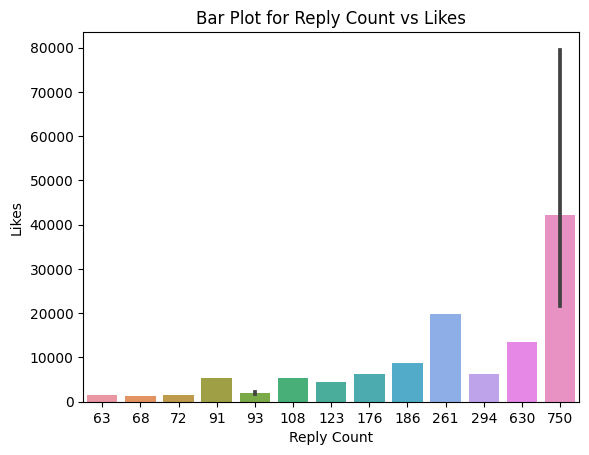

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Likes', y='Cyberbullying', data=df)
plt.title('Bar Plot for Likes vs Cyberbullying')
plt.show()
sns.barplot(x='Reply Count', y='Cyberbullying', data=df)
plt.title('Bar Plot for Reply Count vs Cyberbullying')
plt.show()
sns.barplot(x='Reply Count', y='Likes', data=df)
plt.title('Bar Plot for Reply Count vs Likes')
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Comment'] = label_encoder.fit_transform(df['Comment'])
df['Anonymized Author'] = label_encoder.fit_transform(df['Anonymized Author'])
feature_columns = ['Likes', 'Reply Count', 'Comment', 'Anonymized Author']
x = df[feature_columns]
y = df['Cyberbullying']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Mean Squared Error: 0.0
Accuracy: 1.0


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
report1 = classification_report(y_test, y_pred)

print("Classification Report:\n", report1)


Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared (R2) Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model1 = LinearRegression()
model1.fit(X_train, y_train)

y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training set:")
print("MSE:", train_mse)
print("MAE:", train_mae)
print("R-squared:", train_r2)
print("\nTesting set:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R-squared:", test_r2)


Training set:
MSE: 0.0
MAE: 0.0
R-squared: 1.0

Testing set:
MSE: 0.0
MAE: 0.0
R-squared: 1.0


Confusion Matrix for LinearRegression
[[5]]


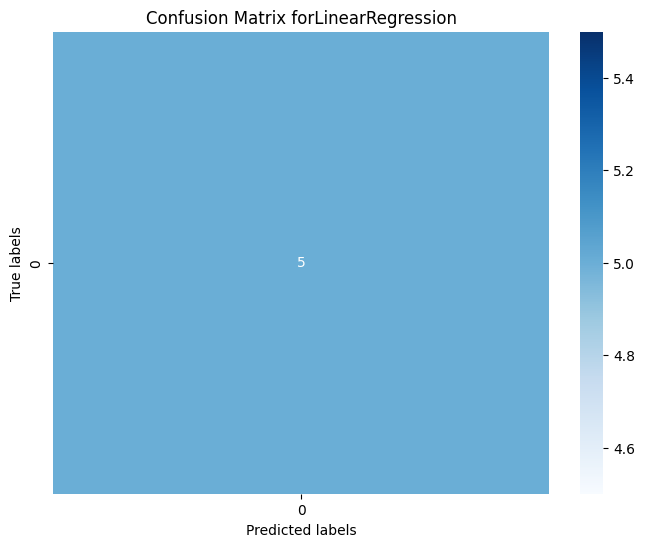

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

logistic_regression_model = LinearRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

# Display the confusion matrix
print("Confusion Matrix for LinearRegression")
print(conf_matrix_logistic_regression)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic_regression, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix forLinearRegression')
plt.show()

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

import numpy as np
unique_classes_train = np.unique(y_train)
print("Unique classes in y_train:", unique_classes_train)


Unique classes in y_train: [0 1]


In [26]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report2 = classification_report(y_test, y_pred)

print("Classification Report:\n", report2)



Mean Squared Error: 0.16666666666666666
Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.78      0.93      0.85        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



In [27]:
from sklearn.metrics import accuracy_score, classification_report
train_predictions = model2.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

# Evaluate the model on testing data
test_predictions = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

# Print the performance metrics
print("Training Accuracy:", train_accuracy)

print("\nTesting Accuracy:", test_accuracy)

# Check for underfitting or overfitting
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

  

Training Accuracy: 0.9857142857142858

Testing Accuracy: 0.8333333333333334
Model might be overfitting.


Confusion Matrix for knn_classifier
[[11  4]
 [ 1 14]]


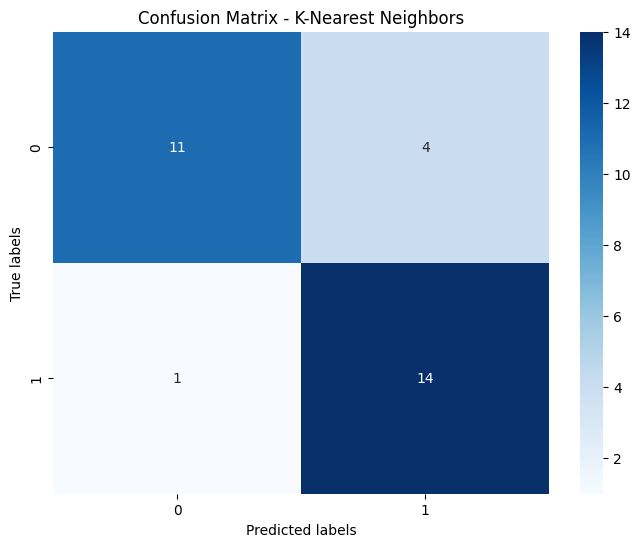

In [28]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for knn_classifier")
print(conf_matrix_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report3 = classification_report(y_test, y_pred)

print("Classification Report:\n", report3)

Mean Squared Error: 0.06666666666666667
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [30]:
from sklearn.metrics import accuracy_score, classification_report
train_predictions = model3.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

# Evaluate the model on testing data
test_predictions = model3.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

# Print the performance metrics
print("Training Accuracy:", train_accuracy)

print("\nTesting Accuracy:", test_accuracy)

# Check for underfitting or overfitting
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

Training Accuracy: 1.0

Testing Accuracy: 0.9333333333333333
Model might be overfitting.


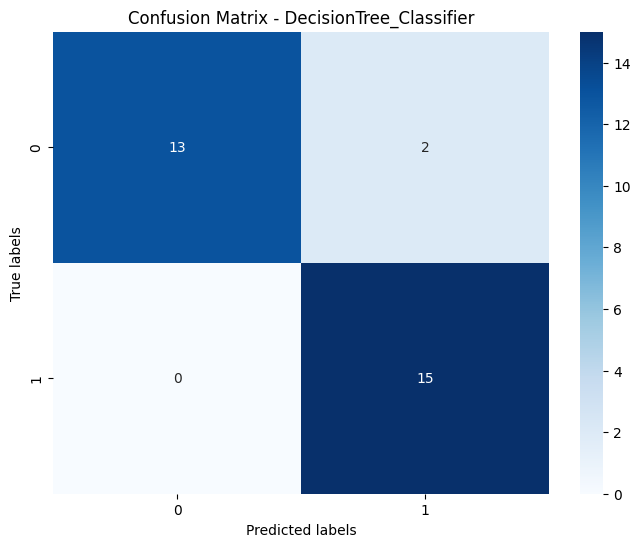

In [31]:
DecisionTree_Classifier= DecisionTreeClassifier()
DecisionTree_Classifier.fit(X_train, y_train)
y_pred_knn = DecisionTree_Classifier.predict(X_test)
conf_matrix_dst = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dst, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - DecisionTree_Classifier')
plt.show()

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

model4 = SVC()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report4 = classification_report(y_test, y_pred)

print("Classification Report:\n", report4)

Mean Squared Error: 0.06666666666666667
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [33]:
from sklearn.metrics import accuracy_score, classification_report
train_predictions = model4.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

test_predictions = model4.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)


print("Training Accuracy:", train_accuracy)

print("\nTesting Accuracy:", test_accuracy)


if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

Training Accuracy: 1.0

Testing Accuracy: 0.9333333333333333
Model might be overfitting.


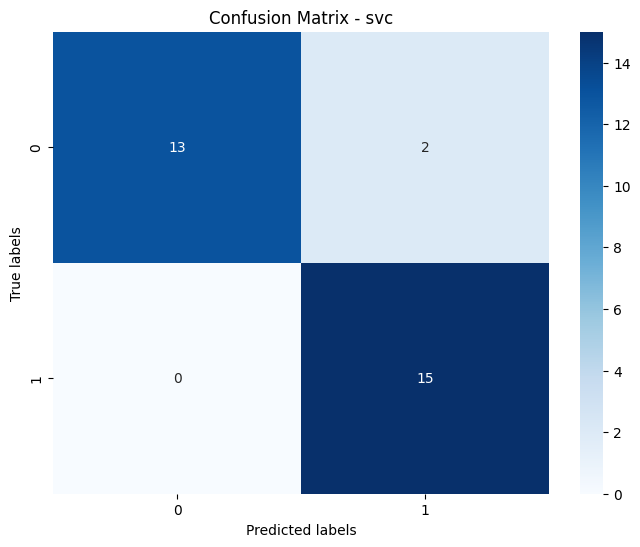

In [34]:
svc= SVC()
svc.fit(X_train, y_train)
y_pred_knn = svc.predict(X_test)
conf_matrix_svc = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - svc')
plt.show()

In [35]:
from sklearn.naive_bayes import GaussianNB

model5 = GaussianNB()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report5 = classification_report(y_test, y_pred)

print("Classification Report:\n", report5)

Mean Squared Error: 0.06666666666666667
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [36]:
from sklearn.metrics import accuracy_score, classification_report
train_predictions = model5.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

test_predictions = model5.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)


print("Training Accuracy:", train_accuracy)

print("\nTesting Accuracy:", test_accuracy)


if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

Training Accuracy: 0.9571428571428572

Testing Accuracy: 0.9333333333333333
Model might be overfitting.


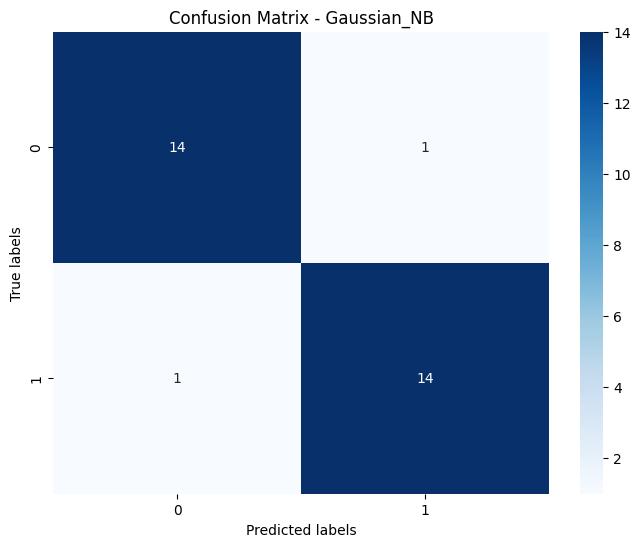

In [37]:
Gaussian_NB= GaussianNB()
Gaussian_NB.fit(X_train, y_train)
y_pred_knn = Gaussian_NB.predict(X_test)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gnb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Gaussian_NB')
plt.show()

In [38]:
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.83
Decision Tree Accuracy: 0.93
SVM Accuracy: 0.93
Naive Bayes Accuracy: 0.93
